In [11]:
import pandas as pd
import scipy
from math import log,e
import numpy as np
from scipy.special import gamma, gammaln, factorial
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('billboard.csv')
data.head()
exposures = data['EXPOSURES']
people = data['PEOPLE']

### Part 1- Question-1

In [3]:
lamda = [4]
def poisson_distribution(lamda):
    poisson_pd = scipy.stats.poisson.pmf(exposures,lamda[0],False)
    peo_ln_poisson = np.array(data['PEOPLE'])*np.log(poisson_pd)
    return -np.sum(peo_ln_poisson)


In [4]:
poisson_distribution(lamda)

935.3081383639649

In [5]:
res = scipy.optimize.minimize(poisson_distribution,lamda,method='nelder-mead')
print(res.x,-res.fun)

[4.45595703] -929.0438827790852


In [6]:
estimated_val = res.x

In [385]:
pred_val = np.array([(np.exp(-estimated_val) * (estimated_val ** k)) / np.math.factorial(k) for k in exposures])
((pred_val).flatten('F'))

array([0.011609204185255373, 0.05173011501650562, 0.11525358486758477,
       0.17118834062249436, 0.190701972516206, 0.16995195906136654,
       0.12621643782570144, 0.08034500336982328, 0.04475173533644613,
       0.022156867748119587, 0.009873005063270988, 0.003999426030113566,
       0.0014851058783207352, 0.0005090436908195377, 0.000162019772380055,
       4.813020959589539e-05, 1.34041341165229e-05, 3.513426215549308e-06,
       8.697597916086123e-07, 2.0397959257457538e-07,
       4.544621498820949e-08, 9.643161010495775e-09,
       1.9531595958270237e-09, 3.783997927903842e-10], dtype=object)

In [392]:
pred_val.flatten('F').shape

(24,)

In [391]:
np.array(people).flatten('F').shape

(24,)

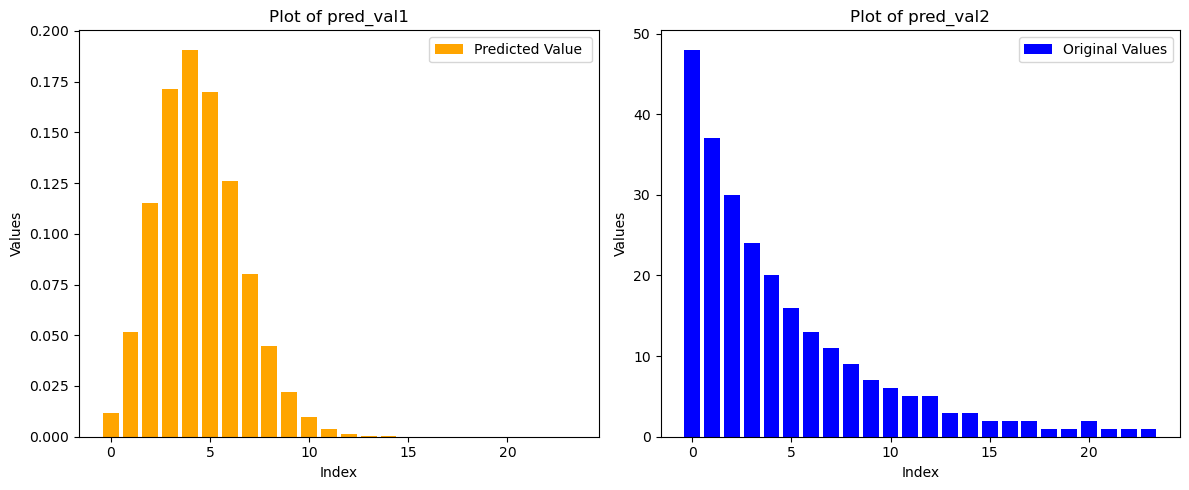

In [406]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
 
# Plot the first array
axs[0].bar(np.arange(0,24),pred_val.flatten('F'), label='Predicted Value ',  color= 'orange')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Values')
axs[0].set_title('Plot of pred_val1')
axs[0].legend()
 
# Plot the second array
axs[1].bar(np.arange(0,24),np.array(people).flatten('F'), label='Original Values', color= 'blue')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Values')
axs[1].set_title('Plot of pred_val2')
axs[1].legend()
 
# Adjust layout to prevent clipping of ylabel
plt.tight_layout()
 
# Show the plots
plt.show()

In [382]:
np.arange(0,23)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [324]:
#Case 2 exposures
p_x_2 = (estimated_val**2*(np.exp(-estimated_val)))/np.math.factorial(2)
print(p_x_2)

[0.11525358]


In [26]:
params = [1,0.5]

### Part 1- Question-2

In [27]:
def nbd(params):
    nbd_output = []
    n = params[0]
    alpha = params[1]
    for i in range(len(exposures)):
        if i==0:
            nbd_output.append(pow(alpha/(alpha+1),n))
        else:
            nbd_output.append(((n+exposures[i]-1)/(exposures[i]*(alpha+1)))*nbd_output[-1])
    nbd_ln = np.array(people)*np.log(nbd_output)
    return -np.sum(nbd_ln)

In [28]:
print(nbd(params))

726.3412025995226


In [29]:
res1 = scipy.optimize.minimize(nbd,params,method='nelder-mead')
print(res1.x,-res1.fun)

[0.96928849 0.21751768] -649.688827609849


In [409]:
def nbd_predict(params):
    nbd_output = []
    n = params[0]
    alpha = params[1]
    for i in range(len(exposures)):
        if i==0:
            nbd_output.append(pow(alpha/(alpha+1),n))
        else:
            nbd_output.append(((n+exposures[i]-1)/(exposures[i]*(alpha+1)))*nbd_output[-1])
    
    return nbd_output

y_pred_nbd = np.array(nbd_predict([res1.x[0],res1.x[1]]))

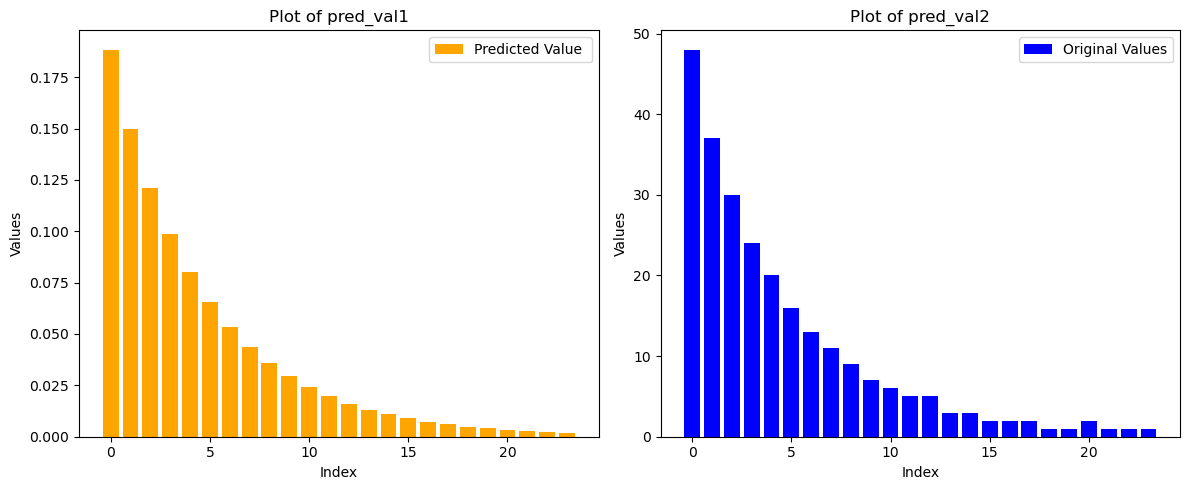

In [410]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
 
# Plot the first array
axs[0].bar(np.arange(0,24),y_pred_nbd.flatten('F'), label='Predicted Value ',  color= 'orange')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Values')
axs[0].set_title('Plot of pred_val1')
axs[0].legend()
 
# Plot the second array
axs[1].bar(np.arange(0,24),np.array(people).flatten('F'), label='Original Values', color= 'blue')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Values')
axs[1].set_title('Plot of pred_val2')
axs[1].legend()
 
# Adjust layout to prevent clipping of ylabel
plt.tight_layout()
 
# Show the plots
plt.show()

In [326]:
def nbd_case(k,alpha,n):
    if k==0:
        return (alpha/(alpha+1))**n
    else:
        return ((n+k-1)/(k*(alpha+1)))*nbd_case(k-1,alpha,n)

In [328]:
#case 2 exposures
alpha1 = res1.x[1]
n1 = res1.x[0]
p_x_2_nbd = nbd_case(2,alpha1,n1)
print(p_x_2_nbd)

0.12127541058940623


In [350]:
params1 = [0.005,0.005,0.005,0.005,0.005,0.743]

khaki_data = pd.read_csv('khakichinos.csv')

### Part1 Question3

In [363]:
def poisson_regression(params):
    lambda_0 = params[0]
    pi = 0.743
    lambda_i = (
        lambda_0 *
        np.exp(
            params[1] * np.array(khaki_data['LnInc']) +
            params[2] * np.array(khaki_data['Sex']) +
            params[3] * np.array(khaki_data['LnAge']) +
            params[4] * np.array(khaki_data['HHSize'])
        )
    )
    poisson_reg_ln_z = (np.array(khaki_data['NumberofVisits'])==0).astype(int) * pi +(1-pi)*scipy.stats.poisson.pmf(khaki_data['NumberofVisits'],lambda_i,False)

    poisson_reg_ln = np.log(poisson_reg_ln_z)
    return -np.sum(poisson_reg_ln)

In [364]:
print(poisson_regression(params1))

18073.448559030556


In [365]:
res2 = scipy.optimize.minimize(poisson_regression,params1,method='CG')
print(res2.x,-res2.fun)

C:\Users\saisa\AppData\Local\Temp\ipykernel_2576\966974354.py:15: RuntimeWarning: divide by zero encountered in log
  poisson_reg_ln = np.log(poisson_reg_ln_z)
C:\Users\saisa\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\saisa\AppData\Local\Temp\ipykernel_2576\966974354.py:15: RuntimeWarning: divide by zero encountered in log
  poisson_reg_ln = np.log(poisson_reg_ln_z)
C:\Users\saisa\AppData\Local\Temp\ipykernel_2576\966974354.py:15: RuntimeWarning: divide by zero encountered in log
  poisson_reg_ln = np.log(poisson_reg_ln_z)
C:\Users\saisa\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\saisa\AppData\Local\Temp\ipykernel_2576\966974354.py:15: RuntimeWarning: divide by zero encountered in log
  poisson_reg_ln = np.log(poisson_reg_ln_z)


[ 6.55208733 -0.08841787 -0.13262175  0.11481495  0.01958786  0.743     ] -4297.47258690153


In [411]:
lambda_0 = res2.x[0]
beta1 = res2.x[1]
y_pred = lambda_0 * np.exp(
            res2.x[1] * np.array(khaki_data['LnInc']) +
            res2.x[2] * np.array(khaki_data['Sex']) +
            res2.x[3] * np.array(khaki_data['LnAge']) +
            res2.x[4] * np.array(khaki_data['HHSize'])
        )

y_pred_3 = []
for k in exposures:
    lambda_i = lambda_0*np.exp(k*beta1)
    p_x = (lambda_i**k*(np.exp(-lambda_i)))/(factorial(k))
    y_pred_3.append(p_x)
print(y_pred_3)

[0.0014271335889165225, 0.014901808734696867, 0.06220254512797334, 0.1389425166708216, 0.18752142720397436, 0.16365485901537483, 0.09649848366146649, 0.039652515312498145, 0.01162097828624824, 0.0024733761407819055, 0.0003879151786877078, 4.5372980120632406e-05, 3.998102730387613e-06, 2.6769815782840636e-07, 1.3721480764823442e-08, 5.419247526107931e-10, 1.658594364858008e-11, 3.953706381168609e-13, 7.373857948831179e-15, 1.0803705532384423e-16, 1.2480344603104495e-18, 1.1404978478466541e-20, 8.269584932153729e-23, 4.770750662440075e-25]


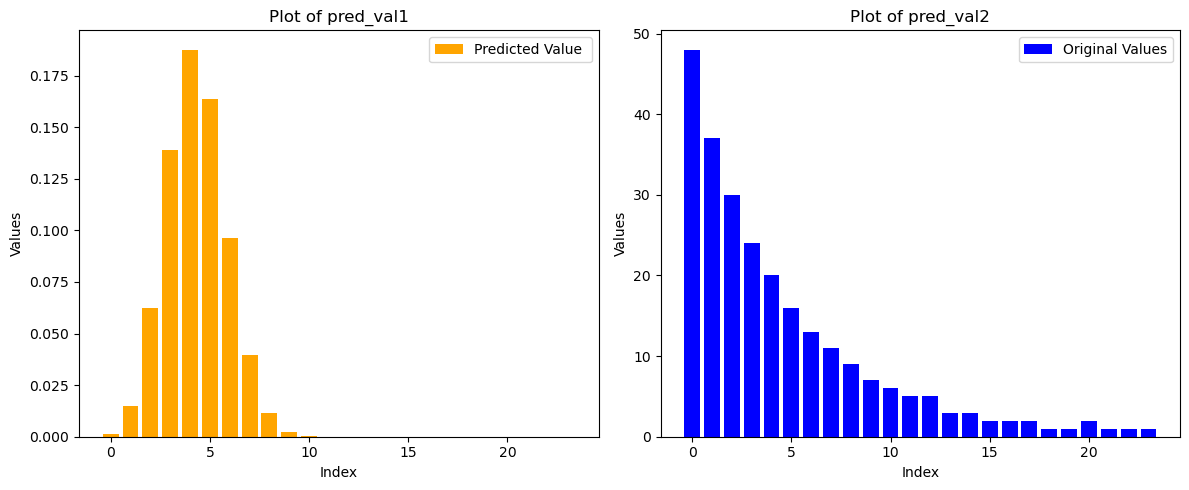

In [412]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
 
# Plot the first array
axs[0].bar(np.arange(0,24),np.array(y_pred_3).flatten('F'), label='Predicted Value ',  color= 'orange')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Values')
axs[0].set_title('Plot of pred_val1')
axs[0].legend()
 
# Plot the second array
axs[1].bar(np.arange(0,24),np.array(people).flatten('F'), label='Original Values', color= 'blue')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Values')
axs[1].set_title('Plot of pred_val2')
axs[1].legend()
 
# Adjust layout to prevent clipping of ylabel
plt.tight_layout()
 
# Show the plots
plt.show()

In [376]:
#Case 2 exposure
lambda_0 = res2.x[0]
beta1 = res2.x[1]
lambda_i = lambda_0 * np.exp(2*beta1)
print(lambda_i**2*(np.exp(-lambda_i))/factorial(2))

0.06220254512797334


### Part1- Question 4 

In [366]:
params2 = [0.5,0.5,0.5,0.5,0.5,0.5,0.5]

In [367]:
def nbd_regression(params):
    alpha = params[1]
    n = params[0]
    pi = params[6]
    exp_beta = np.exp(
            params[2] * np.array(khaki_data['LnInc']) +
            params[3] * np.array(khaki_data['Sex']) +
            params[4] * np.array(khaki_data['LnAge']) +
            params[5] * np.array(khaki_data['HHSize'])
        )
    num_of_visits = np.array(khaki_data['NumberofVisits'])
    part1 = gamma(num_of_visits + n)/((gamma(n))*factorial(num_of_visits))
    part2 = np.power(alpha/(alpha + exp_beta),n)
    part3 = np.power(exp_beta/(alpha + exp_beta),num_of_visits)
    prob = (num_of_visits==0).astype(int)*pi +(1-pi)*part1*part2*part3
    prob_ln = np.log(prob)
    ll = sum(prob_ln)
    #print(ll)
    return -ll
    

In [368]:
nbd_regression(params2)

5932.92560785587

In [369]:
res3 = scipy.optimize.minimize(nbd_regression,params2,method='nelder-mead')
print(res3.x,-res3.fun)

C:\Users\saisa\AppData\Local\Temp\ipykernel_2576\942227338.py:16: RuntimeWarning: invalid value encountered in log
  prob_ln = np.log(prob)


[ 1.98502095e-02  2.39549222e+01  1.53651671e-01  2.97807176e-02
  9.91994837e-01 -2.02943674e-02 -4.96328104e+00] -2872.2422391866203


In [371]:
def nbd_case(k,alpha,n):
    if k==0:
        return (alpha/(alpha+1))**n
    else:
        return ((n+k-1)/(k*(alpha+1)))*nbd_case(k-1,alpha,n)

In [413]:
alpha2 = res3.x[1]
n = res3.x[0]
y_pred_4 = []
for k in exposures:
    y_pred_4.append(nbd_case(k,alpha2,n))
print(y_pred_4)

[0.999188510202948, 0.0007947971585144987, 1.6240764908809032e-05, 4.3817557885646823e-07, 1.325614847160254e-08, 4.2707190865803075e-10, 1.4318063823425521e-11, 4.934188300196442e-13, 1.7349915246706605e-14, 6.195336289032419e-16, 2.2392778843772957e-17, 8.173730516931077e-19, 3.0078663884136863e-20, 1.1144434195500323e-21, 4.153170461841585e-23, 1.5555201860886583e-24, 5.851470912369633e-26, 2.2096239083098056e-27, 8.372311322137303e-29, 3.1819014532389065e-30, 1.2125721852917714e-31, 4.632259825316501e-33, 1.7735507792702972e-34, 6.804150827476309e-36]


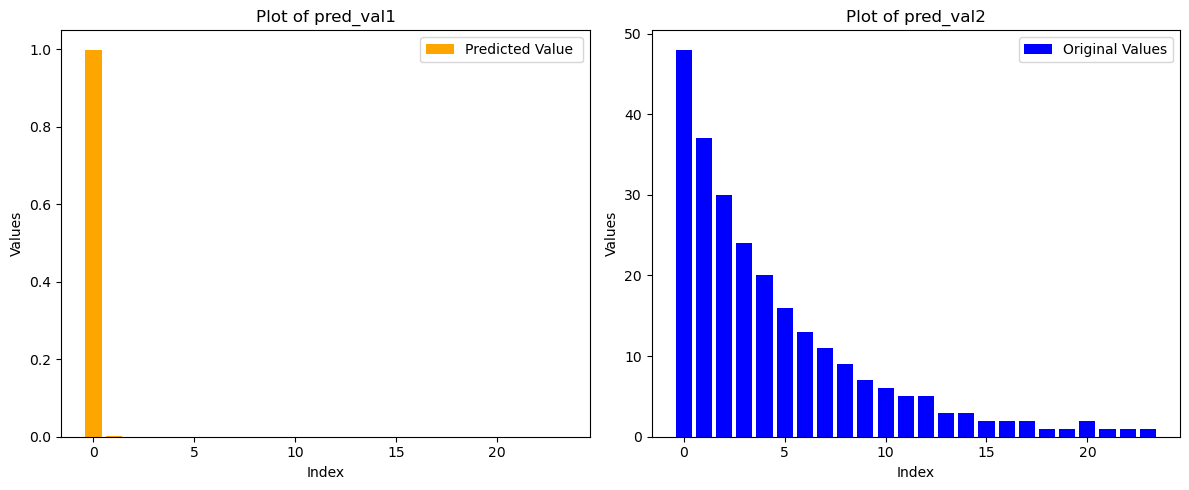

In [414]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
 
# Plot the first array
axs[0].bar(np.arange(0,24),np.array(y_pred_4).flatten('F'), label='Predicted Value ',  color= 'orange')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Values')
axs[0].set_title('Plot of pred_val1')
axs[0].legend()
 
# Plot the second array
axs[1].bar(np.arange(0,24),np.array(people).flatten('F'), label='Original Values', color= 'blue')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Values')
axs[1].set_title('Plot of pred_val2')
axs[1].legend()
 
# Adjust layout to prevent clipping of ylabel
plt.tight_layout()
 
# Show the plots
plt.show()

In [375]:
#Case 2 exposure
print(nbd_case(2,alpha2,n))

1.6240764908809032e-05


# Part - 2

### 1st Question

In [240]:
books = pd.read_csv('books.csv')
books.drop(['date','product','price'],axis=1,inplace=True)

In [241]:
books.head()

,userid,education,region,hhsz,age,income,child,race,country,domain,qty
0,11443031,4.0,1.0,2,11.0,4,1,1,0,amazon.com,1
1,11443031,4.0,1.0,2,11.0,4,1,1,0,amazon.com,1
2,11443031,4.0,1.0,2,11.0,4,1,1,0,amazon.com,1
3,11519009,NaN,2.0,3,5.0,3,1,2,0,amazon.com,1
4,11519009,NaN,2.0,3,5.0,3,1,2,0,amazon.com,1


In [242]:
books2 = books[books['domain']=='barnesandnoble.com']

In [243]:
books2

,userid,education,region,hhsz,age,income,child,race,country,domain,qty
19,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1
20,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1
21,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1
45,14559596,NaN,4.0,2,10.0,5,1,1,0,barnesandnoble.com,1
46,14559596,NaN,4.0,2,10.0,5,1,1,0,barnesandnoble.com,1
...,...,...,...,...,...,...,...,...,...,...,...
40932,15541746,NaN,1.0,4,6.0,3,1,1,0,barnesandnoble.com,1
40933,15541746,NaN,1.0,4,6.0,3,1,1,0,barnesandnoble.com,1
40934,15541746,NaN,1.0,4,6.0,3,1,1,0,barnesandnoble.com,1
40935,15541746,NaN,1.0,4,6.0,3,1,1,0,barnesandnoble.com,1


In [244]:
books2_count = books2.groupby(['qty', 'userid']).size().reset_index(name='qty_count')

# Display the resulting DataFrame
print(books2_count)


      qty    userid  qty_count
0       1   6365661          1
1       1   6396922          1
2       1   8999933          1
3       1   9573834          2
4       1   9576277          5
...   ...       ...        ...
1896    9  10729042          1
1897   10  14606799          1
1898   12  14639373          1
1899   15  11585309          1
1900   20  15563422          1

[1901 rows x 3 columns]


In [245]:
books2.head()

,userid,education,region,hhsz,age,income,child,race,country,domain,qty
19,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1
20,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1
21,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1
45,14559596,NaN,4.0,2,10.0,5,1,1,0,barnesandnoble.com,1
46,14559596,NaN,4.0,2,10.0,5,1,1,0,barnesandnoble.com,1


In [246]:
output = {'education':[],'age':[],'hhsz':[],'income':[],'child':[],'race':[],'country':[],'region':[]}
for i in books2_count['userid']:
    record = books2[books2['userid']==i]
    output['education'].append(record.iloc[0]['education'])
    output['age'].append(record.iloc[0]['age'])
    output['income'].append(record.iloc[0]['income'])
    output['child'].append(record.iloc[0]['child'])
    output['race'].append(record.iloc[0]['race'])
    output['country'].append(record.iloc[0]['country'])
    output['region'].append(record.iloc[0]['region'])
    output['hhsz'].append(record.iloc[0]['hhsz'])

In [247]:
len(output['education'])

1901

In [248]:
books2_count['education'] = output['education']
books2_count['region'] = output['region']
books2_count['hhsz'] = output['hhsz']
books2_count['age'] = output['age']
books2_count['income'] = output['income']
books2_count['child'] = output['child']
books2_count['race'] = output['race']
books2_count['country'] = output['country']


In [249]:
books2_count.tail()

,qty,userid,qty_count,education,region,hhsz,age,income,child,race,country
1896,9,10729042,1,NaN,3.0,3,4.0,7,1,1,0
1897,10,14606799,1,NaN,3.0,4,8.0,4,1,1,0
1898,12,14639373,1,NaN,2.0,5,9.0,6,1,1,1
1899,15,11585309,1,NaN,1.0,4,4.0,1,1,1,1
1900,20,15563422,1,NaN,2.0,2,4.0,1,1,1,0


In [251]:
counts = books.groupby('userid')['domain'].count()
counts

userid
6365661     45
6388054      8
6396922      1
6421559      1
6467806      2
            ..
15701290     1
15701618     2
15701673     1
15701704     1
15702107     6
Name: domain, Length: 9451, dtype: int64

In [252]:
purchases = Counter(counts)
df = pd.DataFrame.from_dict(purchases, orient="index")

In [253]:
df.to_csv('books1.csv', header=['Count of number of purchases'], index_label='Number of purchases')

In [254]:
books2_count.to_csv('books2.csv')

In [256]:
books1 = pd.read_csv('books1.csv')
books1.sort_values(by='Number of purchases',inplace=True)
books1.head(10)

,Number of purchases,Count of number of purchases
2,1,3304
3,2,1825
8,3,1170
6,4,762
7,5,483
4,6,361
12,7,255
1,8,205
13,9,184
19,10,149


### 2ndquestion

In [258]:
lamda = [4.456]
def poisson_distribution_books(lamda):
    purchases = books1['Number of purchases'][:-2]
    poisson_pd = scipy.stats.poisson.pmf(purchases,lamda[0],False)
    peo_ln_poisson = np.array(books1['Count of number of purchases'][:-2])*np.log(poisson_pd)
    return -np.sum(peo_ln_poisson)


In [259]:
poisson_distribution_books(lamda)

38055.27100016996

In [260]:
res4 = scipy.optimize.minimize(poisson_distribution_books,lamda,method='nelder-mead')
print(res4.x,-res4.fun)

[4.27959854] -38021.83729033955


In [197]:
estimated_val1 = res4.x

In [198]:
pred_val1 = np.array([(np.exp(-estimated_val1) * (estimated_val1 ** k)) / np.math.factorial(k) for k in khaki_data['NumberofVisits']])
(pred_val1)

array([[0.028182818114810274],
       [0.13600721128764068],
       [0.028182818114810274],
       ...,
       [0.028182818114810274],
       [0.028182818114810274],
       [0.028182818114810274]], dtype=object)

In [257]:
books2 = pd.read_csv('books2.csv')
books2.sort_values(by='qty_count',inplace=True)
books2.head(10)

,Unnamed: 0,qty,userid,qty_count,education,region,hhsz,age,income,child,race,country
0,0,1,6365661,1,5.0,1.0,2,11.0,7,0,1,0
1087,1087,1,14587761,1,NaN,2.0,3,7.0,7,1,1,0
1086,1086,1,14586722,1,NaN,3.0,5,9.0,7,1,1,0
1085,1085,1,14585094,1,NaN,2.0,2,3.0,5,1,1,0
1084,1084,1,14585073,1,NaN,2.0,1,4.0,4,0,1,1
1083,1083,1,14585055,1,NaN,1.0,3,10.0,5,1,1,0
1082,1082,1,14584848,1,NaN,2.0,5,7.0,5,1,1,0
1073,1073,1,14581934,1,NaN,1.0,2,7.0,1,1,1,0
1072,1072,1,14581602,1,NaN,1.0,1,7.0,6,0,1,0
1071,1071,1,14581517,1,NaN,3.0,5,6.0,5,1,1,0


### Question 3

In [261]:
lamda = [4]
def poisson_distribution_books2(lamda):
    purchases = books2['qty_count']
    poisson_pd = scipy.stats.poisson.pmf(purchases,lamda[0],False)
    peo_ln_poisson = np.array(books2['qty'])*np.log(poisson_pd)
    return -np.sum(peo_ln_poisson)


In [262]:
print(poisson_distribution_books2(lamda))

7721.540045452083


In [263]:
res5 = scipy.optimize.minimize(poisson_distribution_books2,lamda,method='nelder-mead')
print(res5.x,-res5.fun)

[3.19365234] -7528.0436924066325


In [203]:
estimated_val2 = res5.x
pred_val2 = np.array([(np.exp(-estimated_val2) * (estimated_val2 ** k)) / np.math.factorial(k) for k in khaki_data['NumberofVisits']])
(pred_val2)

array([[0.04102177138800207],
       [0.11357202060560108],
       [0.04102177138800207],
       ...,
       [0.04102177138800207],
       [0.04102177138800207],
       [0.04102177138800207]], dtype=object)

### Question 4

In [264]:
def nbd_books(params):
    nbd_output = []
    n = params[0]
    alpha = params[1]
    purchases = books1['Number of purchases']
    count_purchases = books1['Count of number of purchases']
    for i in range(len(purchases)):
        if i==0:
            nbd_output.append(pow(alpha/(alpha+1),n))
        else:
            nbd_output.append(((n+purchases[i]-1)/(purchases[i]*(alpha+1)))*nbd_output[-1])
    nbd_ln = np.array(count_purchases)*np.log(nbd_output)
    return -np.sum(nbd_ln)

In [265]:
params4 = [1,1]
nbd_books(params4)

27817.38265023172

In [266]:
res6 = scipy.optimize.minimize(nbd_books,params4, bounds=[(0.000001, None),(0.000001, None)],method='nelder-mead')
print(res6.x,-res6.fun)

[0.20918168 0.06442521] -18176.433939792965


### 5th Question

In [284]:
def nbd_books2(params):
    nbd_output = []
    n = params[0]
    alpha = params[1]
    purchases = books2['qty_count']
    count_purchases = books2['qty']
    for i in range(len(purchases)):
        if i==0:
            nbd_output.append(pow(alpha/(alpha+1),n))
        else:
            value = ((n+purchases[i]-1)/(purchases[i]*(alpha+1)))*nbd_output[-1]
            if value>0:
                nbd_output.append(value)

    nbd_ln = np.array(count_purchases[:len(nbd_output)])*np.log(nbd_output)
    return -np.sum(nbd_ln)

In [285]:
params5 = [0.5,0.5]
nbd_books2(params5)

675201.4628008709

In [286]:
res7 = scipy.optimize.minimize(nbd_books2,params5, bounds=[(0.000001, None),(0.000001, None)],method='nelder-mead')
print(res7.x,-res7.fun)

[0.41432614 0.54329652] -662012.5399128349


### 6 th Qeustion

In [295]:
n = res7.x[0]
alpha = res7.x[1]
t = len(books2['qty'])
p_x_t = (alpha/(alpha+t))**n
reach = 100*(1-p_x_t)
# print(p_x_t,n,alpha,t)
print('Reach = ',reach,' %')

Reach =  96.5990563736731  %


In [296]:
e_x_t = (n*t)/alpha
e_x_t

1449.7313616415179

In [297]:
avg_frequency = (e_x_t)/(1-p_x_t)
print(avg_frequency)

1500.7717632701685


In [298]:
grps = reach * avg_frequency
print(grps)

144973.13616415177


###  7th question

In [299]:
print(books2.isnull().sum())


Unnamed: 0       0
qty              0
userid           0
qty_count        0
education     1399
region           2
hhsz             0
age              1
income           0
child            0
race             0
country          0
dtype: int64


In [303]:
books2.drop('education',axis=1,inplace=True)

In [301]:
books2.dropna(inplace=True)

In [302]:
print(books2.isnull().sum())

Unnamed: 0    0
qty           0
userid        0
qty_count     0
education     0
region        0
hhsz          0
age           0
income        0
child         0
race          0
country       0
dtype: int64


### 8th Question

In [317]:
def poisson_regression_books(params):
    lambda_0 = params[0]
    lambda_i = (
        lambda_0 *
        np.exp(
            params[2] * np.array(books2['region']) +
            params[3] * np.array(books2['hhsz']) +
            params[4] * np.array(books2['age']) +
            params[5] * np.array(books2['country'])+
            params[6] * np.array(books2['income']) + 
            params[7] * np.array(books2['race']) +
            params[8] * np.array(books2['child'])
        )
    )
    
    pmf_values = scipy.stats.poisson.pmf(books2['qty_count'],lambda_i,False)
    poisson_reg_ln = np.log(pmf_values[:-2])
    return -np.sum(poisson_reg_ln)

In [318]:
params6 = [0.0001]*9
print(poisson_regression_books(params6))

17052.003064941997


In [320]:
res8 = scipy.optimize.minimize(poisson_regression_books,params6,method='CG')
print(res8.x,-res8.fun)

C:\Users\saisa\AppData\Local\Temp\ipykernel_2576\2477786040.py:17: RuntimeWarning: divide by zero encountered in log
  poisson_reg_ln = np.log(pmf_values[:-2])
C:\Users\saisa\AppData\Local\Temp\ipykernel_2576\2477786040.py:17: RuntimeWarning: divide by zero encountered in log
  poisson_reg_ln = np.log(pmf_values[:-2])
C:\Users\saisa\AppData\Local\Temp\ipykernel_2576\2477786040.py:17: RuntimeWarning: divide by zero encountered in log
  poisson_reg_ln = np.log(pmf_values[:-2])
C:\Users\saisa\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\saisa\AppData\Local\Temp\ipykernel_2576\2477786040.py:17: RuntimeWarning: divide by zero encountered in log
  poisson_reg_ln = np.log(pmf_values[:-2])


[ 4.01131542e+00  1.00000000e-04 -1.19992757e-01 -4.08485712e-02
  4.31278801e-02 -2.14721561e-01 -2.14572385e-02 -5.21687602e-02
  1.41684372e-01] -1484.0686809496724


In [415]:
y_pred_8 = []
lambda_0 = res8.x[0]
beta1 = res8.x[2]
beta2 = res8.x[3]
beta3 = res8.x[4]
beta4 = res8.x[5]
for i in range(len(khaki_data['ID'])):
    #print(k)
    k = khaki_data['NumberofVisits'][i]
    lambda_i = lambda_0*np.exp(khaki_data['LnInc'][i]*beta1+khaki_data['Sex'][i]*beta2+khaki_data['LnAge'][i]*beta3+khaki_data['HHSize'][i]*beta4)
    p_x = (lambda_i**k*(np.exp(-lambda_i)))/(factorial(k))
    y_pred_8.append(p_x)
print(y_pred_8)

[0.4695219348904855, 0.005222698173845902, 0.4504954991278512, 0.5235491642382445, 0.5397433922000275, 0.5244204305306355, 0.4500688257960938, 0.35557327719147463, 0.31104151773940697, 0.511108683429252, 0.36328229690544367, 0.4330394296789776, 0.04520630066476461, 0.36037620358421824, 0.5004817918176062, 0.33731730634179885, 0.12320519051329488, 0.427246502594946, 0.000121350683149494, 0.4313020517172898, 0.07977204359184807, 0.4677182285310304, 0.46820480056412633, 0.12669352448769172, 0.44867522461315273, 0.40641932542798737, 0.5897688994620253, 0.48325281435624423, 0.5256594229359344, 0.5158879276710993, 0.4692263707589957, 0.5782528903091179, 0.6060312170332773, 0.29802993023738084, 0.3373248813401867, 0.5853361441947769, 0.15687530008847964, 0.11945763461349193, 0.3677667382517725, 0.4846420331940202, 0.5324113096805834, 0.5397131828111712, 0.5253231866257424, 0.7048550848909142, 0.36012484538647954, 0.47721556507159646, 0.622554032435852, 0.3552482629608799, 0.5184847581502348, 

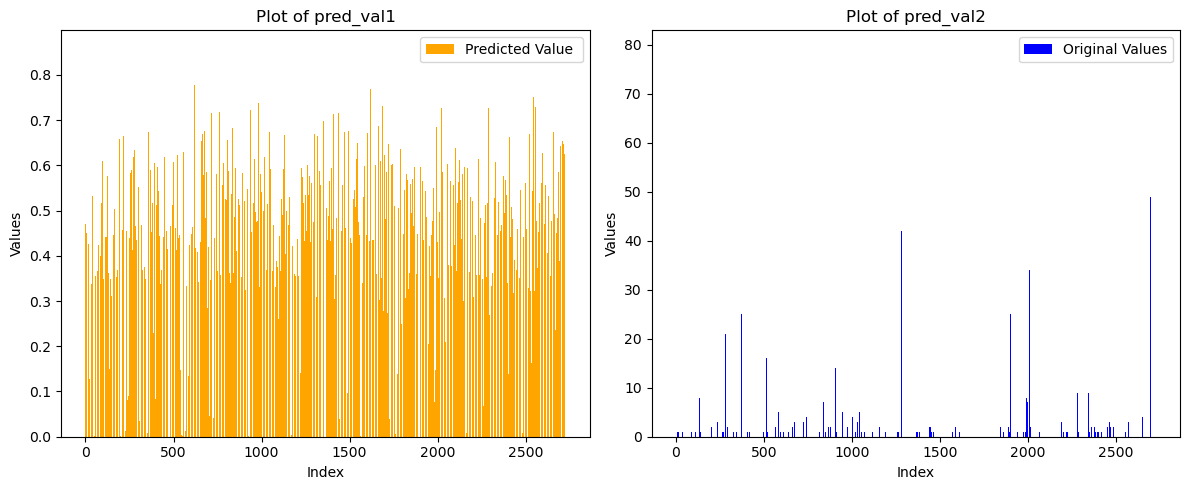

In [418]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
 
# Plot the first array
axs[0].bar(np.arange(0,2728),np.array(y_pred_8).flatten('F'), label='Predicted Value ',  color= 'orange')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Values')
axs[0].set_title('Plot of pred_val1')
axs[0].legend()
 
# Plot the second array
axs[1].bar(np.arange(0,2728),np.array(khaki_data['NumberofVisits']).flatten('F'), label='Original Values', color= 'blue')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Values')
axs[1].set_title('Plot of pred_val2')
axs[1].legend()
 
# Adjust layout to prevent clipping of ylabel
plt.tight_layout()
 
# Show the plots
plt.show()

### 9th Question

In [321]:
def nbd_regression_books(params):
    alpha = params[1]
    n = params[0]
    exp_beta = np.exp(
            params[2] * np.array(books2['region']) +
            params[3] * np.array(books2['hhsz']) +
            params[4] * np.array(books2['age']) +
            params[5] * np.array(books2['country'])+
            params[6] * np.array(books2['income']) + 
            params[7] * np.array(books2['race']) +
            params[8] * np.array(books2['child'])
        )
    num_of_visits = np.array(books2['qty_count'])
    part1 = gamma(num_of_visits + n)/((gamma(n))*factorial(num_of_visits))
    part2 = np.power(alpha/(alpha + exp_beta),n)
    part3 = np.power(exp_beta/(alpha + exp_beta),num_of_visits)
    prob = part1*part2*part3
    prob_ln = np.log(prob)
    ll = sum(prob_ln)
    #print(ll)
    return -ll
    

In [421]:
params7 = [0.5] * 9
ll_9 = nbd_regression_books(params7)

In [323]:
res9 = scipy.optimize.minimize(nbd_regression_books,params,method='nelder-mead')
print(res9.x,-res9.fun)

[ 1.12924715  2.33637017  0.00364275  0.0700948   0.09056178 -0.19301087
  0.0203396   0.90166511  0.11633885] -1243.714988140197


In [419]:
y_pred_9 = []
lambda_0 = res9.x[0]
beta1 = res9.x[2]
beta2 = res9.x[3]
beta3 = res9.x[4]
beta4 = res9.x[5]
for i in range(len(khaki_data['ID'])):
    #print(k)
    k = khaki_data['NumberofVisits'][i]
    lambda_i = lambda_0*np.exp(khaki_data['LnInc'][i]*beta1+khaki_data['Sex'][i]*beta2+khaki_data['LnAge'][i]*beta3+khaki_data['HHSize'][i]*beta4)
    p_x = (lambda_i**k*(np.exp(-lambda_i)))/(factorial(k))
    y_pred_9.append(p_x)
print(y_pred_9)

[0.2956593716986261, 0.013870144267246344, 0.3393357776957004, 0.3641249419574941, 0.4013277885529954, 0.42325086918625754, 0.3282001317723811, 0.3636944305777048, 0.24200935196168932, 0.3932595902330127, 0.3646038243994746, 0.3178103128188288, 0.07497183183723077, 0.26091880478908036, 0.3773037853850241, 0.36737020134776116, 0.20436222353255173, 0.31925041575254787, 0.0010594762418843471, 0.3063782111743623, 0.14099265921859203, 0.30918675110250476, 0.3102305030827881, 0.218724943592399, 0.3077248530204416, 0.31091303992811, 0.44996951380112676, 0.317519438288508, 0.3689417168801469, 0.4040097736516637, 0.3124246647243792, 0.46224309151754783, 0.47928864886578154, 0.24547709139253995, 0.24039819453151962, 0.4562379744300415, 0.21592301411065082, 0.2170941761118166, 0.3437653863803541, 0.40732675021475856, 0.36871784957879145, 0.35764405274348443, 0.3818515622171078, 0.5795589982845226, 0.2736270360709926, 0.3121756901585186, 0.4879850298447291, 0.26379446181947686, 0.4020299137878135,

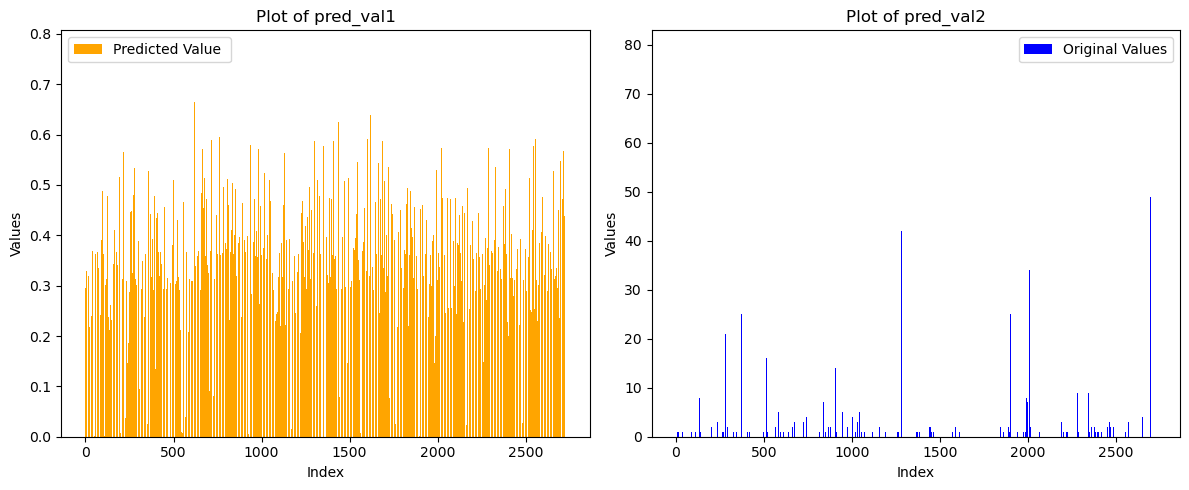

In [420]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
 
# Plot the first array
axs[0].bar(np.arange(0,2728),np.array(y_pred_9).flatten('F'), label='Predicted Value ',  color= 'orange')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Values')
axs[0].set_title('Plot of pred_val1')
axs[0].legend()
 
# Plot the second array
axs[1].bar(np.arange(0,2728),np.array(khaki_data['NumberofVisits']).flatten('F'), label='Original Values', color= 'blue')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Values')
axs[1].set_title('Plot of pred_val2')
axs[1].legend()
 
# Adjust layout to prevent clipping of ylabel
plt.tight_layout()
 
# Show the plots
plt.show()

In [424]:
k = 9
aic = 2*k - 2*ll_9
bic = k*np.log(len(khaki_data['ID'])) - 2*ll_9
print(aic,bic)

-6294.457650443286 -6241.255734272616


In [427]:
n = len(khaki_data['ID'])
models = {'Models':['Poisson','NBD','Poisson_Regression','NBD_Regression'],'LL':[-7528.043692,-662012.53991,-1484.06868,-1243.7149881401],'Parameters':[1,7,7,7]}
for i in range(4):
    print(models['Models'][i], '   AIC =   ',2*models['Parameters'][i] - 2*models['LL'][i],'   BIC=   ', models['Parameters'][i]*np.log(n)-models['LL'][i] )

Poisson    AIC =    15058.087384    BIC=    7535.955016018964
NBD    AIC =    1324039.07982    BIC=    662067.9191781328
Poisson_Regression    AIC =    2982.13736    BIC=    1539.4479481327435
NBD_Regression    AIC =    2501.4299762802    BIC=    1299.0942562728435
